In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from IPython.display import Image

# Co znaczy określenie 'obraz'? 
Obraz można zdefiniować jako dwuwymiarową funkcję F(x,y), gdzie x,y są współrzędnymi przestrzennymi, a amplituda funkcji F dla określonych wartości x,y (czyli wartość funkcji F) jest rozumiana jako intensywność obrazu w tym punkcie. Jeśli wartości te są skończone, możemy mówić o obrazach cyfrowych.

Przede wszystkim, jeśli wchodzisz do świata technik cyfrowego przetwarzania obrazów, musisz zacząć myśleć o obrazach 2D, jak o macierzy 2D. Podstawową jednostką obrazu 2D jest piksel, który zawiera informacje o intensywności i kolorze obrazu w danym punkcie. Z serii obrazów 2D (płaszczyzn) możemy skonstruować objętość, czyli obraz 3D, którego najmniejszy element to woksel. 

Innymi słowy, obraz 2D to dwuwymiarowa tablica pikseli ułożonych w kolumnach i wierszach. Liczba kolumn i wierszy określa rozmiar obrazu, odpowiednio szerokość i wysokość. 
W przypadku obrazu 3D chodzi o trójwymiarową tablicę wokseli ułożoną w kolumnach, rzędach i tubach (szerokość, wysokość i głębokość).

Istnieją różne rodzaje obrazów:
- obraz w skali szarości - piksel / woksel składa się tylko z 1 warstwy (kanału), zawierającej odcienie szarości (w zakresie od czerni do bieli - od najciemniejszego do najjaśniejszego)
- Obraz RGB - piksel / woksel składa się z 3 warstw (kanałów), z których każda odpowiada za jedną składową koloru: R (czerwony), G (zielony) i B (niebieski).


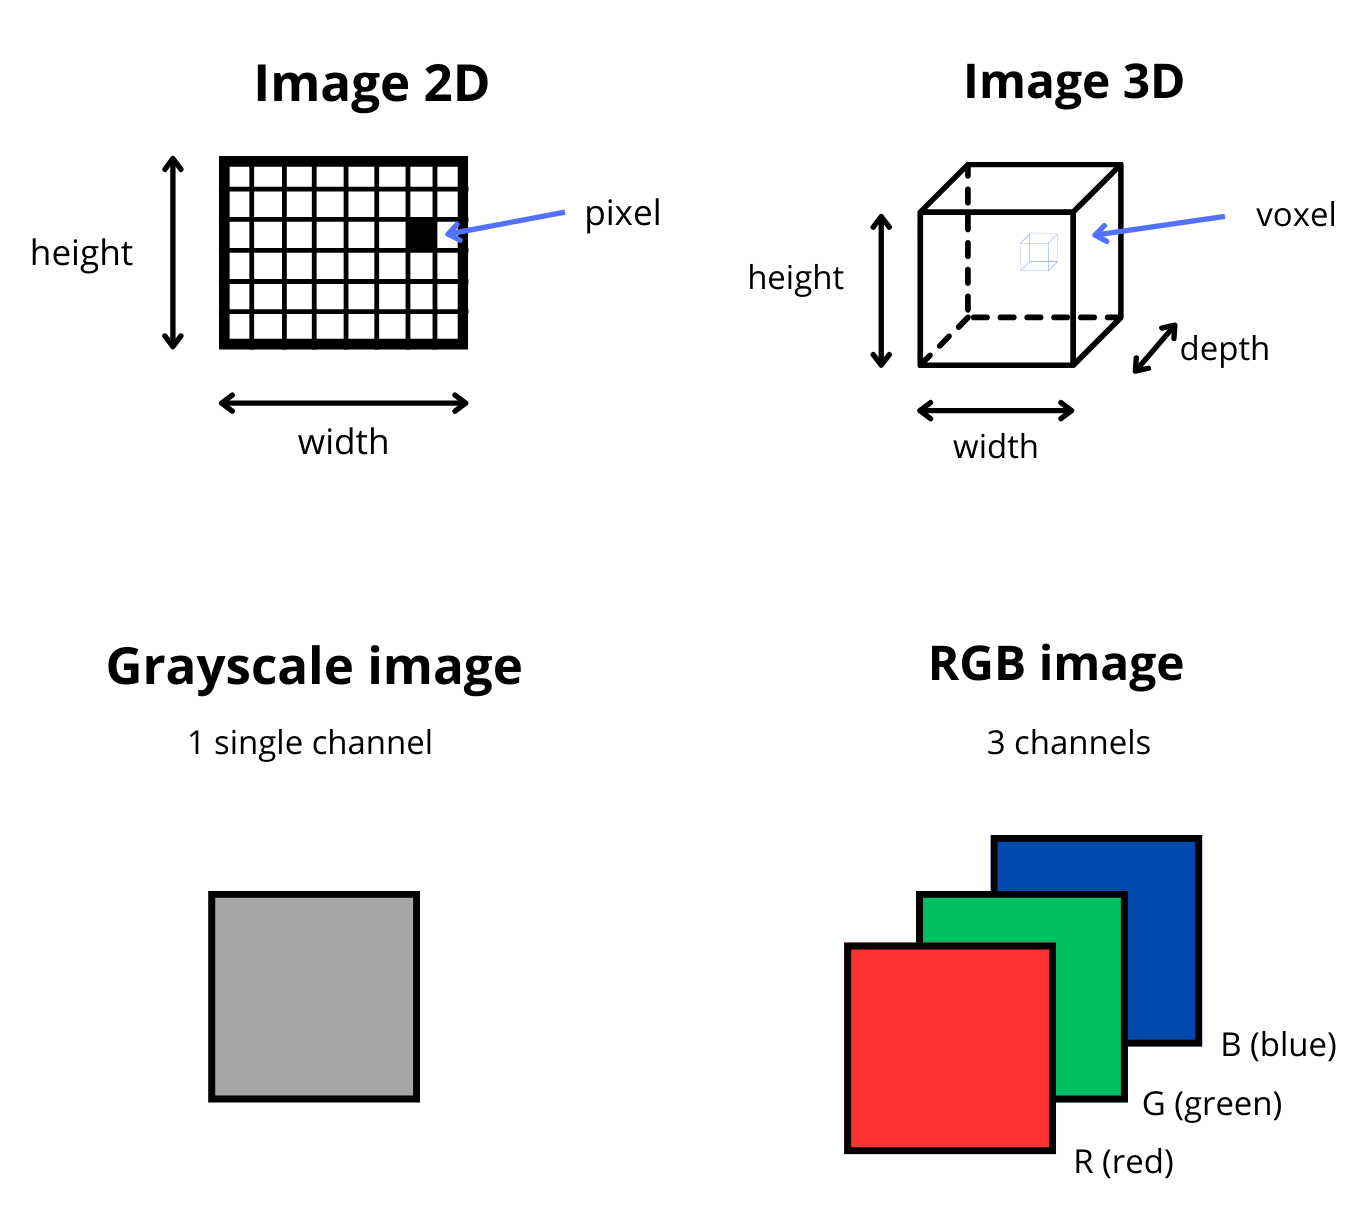

In [48]:
Image(filename="./images/1_1.png", width=600)

Image shape: (450, 280, 4) - it is a RGBA image (with 4 channels, RGB + 1 alpha channel)
Image type: uint8
Minimum value 2 and maximum value 255


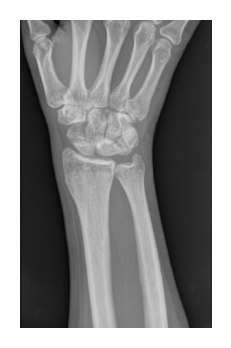

In [49]:
image = io.imread("images/example1.png")

print(f"Image shape: {image.shape} - it is a RGBA image (with 4 channels, RGB + 1 alpha channel)")
print(f"Image type: {image.dtype}")
print(f"Minimum value {np.min(image)} and maximum value {np.max(image)}")

plt.figure(figsize=(2, 2), dpi=200)
plt.imshow(image, cmap='gray')
plt.axis('off')
plt.show()

# Normalizacja vs standaryzacja danych
Celem tych dwóch metod jest umieszczenie wszystkich cech w tej samej skali (= usunięcie wpływu skali).

Normalizacja to proces zmiany zakresu wartości intesywności pikseli do zakresu [0, 1]. Jest to ważny krok we wstępnym przetwarzaniu danych przed szkoleniem modelów DL lub algorytmów opartych na odległości (takich jak KNN), ponieważ lepiej radzą sobie one z małymi wartościami zmiennoprzecinkowymi. Wpływa to również pozytywnie na szybkość uczenia i wydajność modelu (jest lepsza).

Standaryzacja to technika skalowania danych, która zakłada, że rozkład danych jest gaussowski i przesuwa rozkład danych tak, aby średnia wynosiła 0, a odchylenie standardowe 1. Jest ona preferowana w przypadku algorytmów, które są wrażliwe na skalę cech lub zakładają normalność, takich jak regresja logistyczna i maszyny wektorów nośnych. 

Normalized image shape: (450, 280)
Normalized image type: float64
Normalized image mean 0.4478877967088976 and std 0.27598559780734383
Normalized image: minimum value 0.0 and maximum value 1.0


Standardized image shape: (450, 280)
Standardized image type: float64
Standardized image mean -4.161750309452015e-17 and std 0.9999999999999999
Standardized image minimum value -1.622866556324989 and maximum value 2.000510924039279


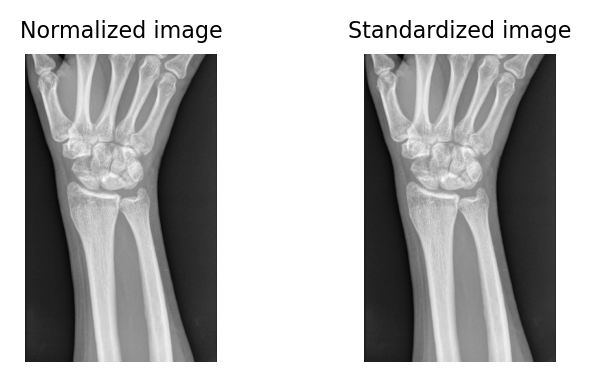

In [50]:
# Converting image: To remove 4th channel - alpha -> converting from BGRA to RGB
image = image[:,:,0:3]
image = color.rgb2gray(image)

normalize = lambda image: (image - np.min(image)) / (np.max(image) - np.min(image)) 
normalized_image = normalize(image)

mean = np.mean(image, keepdims=True)
std = np.std(image,  keepdims=True)
standardized_image = (image - mean) / std

print(f"Normalized image shape: {normalized_image.shape}")
print(f"Normalized image type: {normalized_image.dtype}")
print(f"Normalized image mean {np.mean(normalized_image)} and std {np.std(normalized_image)}")
print(f"Normalized image: minimum value {np.min(normalized_image)} and maximum value {np.max(normalized_image)}")
print(f"\n")
print(f"Standardized image shape: {standardized_image.shape}")
print(f"Standardized image type: {standardized_image.dtype}")
print(f"Standardized image mean {np.mean(standardized_image)} and std {np.std(standardized_image)}")
print(f"Standardized image minimum value {np.min(standardized_image)} and maximum value {np.max(standardized_image)}")

plt.figure(figsize=(4, 2),dpi=200)
plt.subplot(1, 2, 1)
plt.imshow(normalized_image, cmap='gray')
plt.title("Normalized image", fontsize=8)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(standardized_image, cmap='gray')
plt.title("Standardized image", fontsize=8)
plt.axis('off')
plt.show()

# Stwórz obraz (macierz) w Pythonie

Jak powiedzieliśmy wcześniej, obraz jest macierzą. Możemy użyć niektórych funkcji z biblioteki NumPy (https://numpy.org/doc/stable/reference/routines.array-creation.html), np:
- np.array - tworzenie tablicy o określonym rozmiarze (https://numpy.org/doc/stable/reference/generated/numpy.array.html)
- np.zeros - tworzenie tablicy zer (https://numpy.org/doc/stable/reference/generated/numpy.zeros.html)
- np.ones - tworzenie tablicy jedynek (https://numpy.org/doc/stable/reference/generated/numpy.ones.html) 

Co warto jeszcze umieć?
1. Aby uzyskać dostęp do wybranego elementu (elementów) tablicy, użyj indeksowania (https://numpy.org/devdocs/user/basics.indexing.html).
2. Aby iterować po tablicy, użyj pętli for (https://wiki.python.org/moin/ForLoop)
3. Aby utworzyć macierze współrzędnych, użyj siatki mesh (https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html, https://www.geeksforgeeks.org/numpy-meshgrid-function/).

# Źródła
- https://neptune.ai/blog/image-processing-python
- https://machinelearningmastery.com/how-to-normalize-center-and-standardize-images-with-the-imagedatagenerator-in-keras/ 